# Supermarket EDA

In [11]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
mon = pd.read_csv('data/monday.csv', sep=';', index_col=0, parse_dates=True)
tue = pd.read_csv('data/tuesday.csv', sep=';', index_col=0, parse_dates=True)
wed = pd.read_csv('data/wednesday.csv', sep=';', index_col=0, parse_dates=True)
thu = pd.read_csv('data/thursday.csv', sep=';', index_col=0, parse_dates=True)
fri = pd.read_csv('data/friday.csv', sep=';', index_col=0, parse_dates=True)


In [13]:
def feat_eng(day):
    '''feature engineer the customer dataframe by,
    creating unique identifier for customers over the week,
    creating features for the ailes,
    adding the missing rows for customers' checkout'''
    
    #update the customer columns adding the weekly day'''
    lst = ['m_','tu_','w_','th_','fr_']
    wd = day.index[1].weekday()
    day['cust_no'] = lst[wd]+day['customer_no'].astype('str')
    day.drop('customer_no', axis=1, inplace=True)
    day.reset_index(inplace=True)
    
    #group-by and creation of new timestamps 
    new_day = day.groupby(['timestamp','cust_no'])['location'].value_counts().unstack()
    new_day.fillna(0,inplace=True)
    
    #find the missing checkouts
    chkt = pd.DataFrame(data=new_day.index.get_level_values(1).value_counts() == 1)
    lst = list(chkt[chkt['cust_no']==True].index)
    
    #reset the index (some residual problem here)
    new_day.reset_index(inplace=True, col_level=1)
    
    #append the new rows for missing checkouts
    mnt = new_day['timestamp'].max()+datetime.timedelta(minutes=1)
    count = 0
    for i in range(len(lst)):
        new_day.loc[len(new_day)+count] = [mnt,lst[i],1.0,0.0,0.0,0.0,0.0]
        count = count+1
    
    return new_day

In [14]:
mon = feat_eng(mon)
tue = feat_eng(tue)
wed = feat_eng(wed)
thu = feat_eng(thu)
fri = feat_eng(fri)

In [15]:
wk = pd.concat([mon,tue,wed,thu,fri],ignore_index=True) 
wk

<AxesSubplot:xlabel='location'>

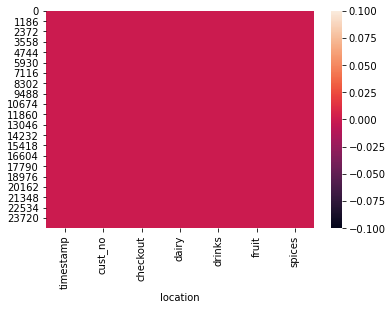